In [15]:
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [56]:
url = 'https://finance.daum.net/domestic/market_cap?view=pc'
driver = webdriver.Chrome()
driver.get(url)

In [57]:
path = '#boxMarketCap > div.box_contents > div > table > tbody > tr.first > td:nth-child(2) > a'
driver.find_element_by_css_selector(path).click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_20408/2089834717.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector(path).click()


In [59]:
#boxTabs > td.on > a

path = '#boxTabs > td:nth-child(7) > a'
driver.find_element_by_css_selector(path).click()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_20408/4144324678.py:4: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector(path).click()


In [21]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

<html lang="ko"><head><script id="adfitScript" src="//t1.daumcdn.net/kas/static/ba.min.js"></script>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="https://s1.daumcdn.net/svc/attach/U03/cssjs/socialshare/socialshare_standalone-1.9.4.merged.js"></script><style>/* 2017-01-03 소셜쉐어 */
/* 소셜쉐어 공통 */
.sns_comm .ico_sns{display:inline-block;overflow:hidden;background:url(https://t1.daumcdn.net/media/img-media/mobile/m320/social/ico_sns_170103.png) 0 0 no-repeat;background-size:276px 76px;font-size:1px;line-height:0;color:transparent;vertical-align:top}
.type_normal .ico_sns{width:35px;height:35px}
.sns_comm{overflow:hidden}
.sns_comm .list_sns{float:left}
.sns_comm .list_sns .link_sns{display:block}
.sns_comm .list_sns li{float:left}
.sns_comm .list_sns li+li{padding-left:5px}
.sns_comm .link_more{float:left;padding-left:5px}

/* 소셜쉐어 NormalType */
.type_normal .ico_sns_kt{background-position:0 0}
.type_normal .ico_sns_ks{back
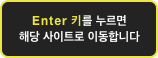
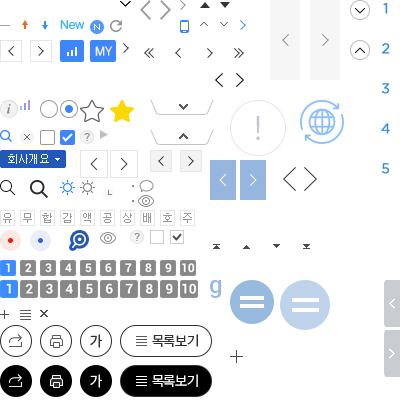
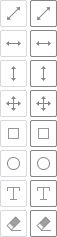

In [22]:
# soup

In [65]:
financial_path = '#cTB26 > tbody'
soup.select(financial_path)

[]